# Packages used in the project.

In [1]:
from bs4 import BeautifulSoup
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import time
import os
import re

In [2]:
# a function that will be used to create directories so we can store files in.
def create_directory(directory_name):
    """
    A functions that creates a directory in the current directory 
    returns the relative path.
    """
    try:
        # Create directory inside the current directory...
        os.mkdir(directory_name)
        print(f"Directory <{directory_name}> Created.")
        return directory_name
    
    except FileExistsError:
        print(f"Directory <{directory_name}> already exists.")
        return directory_name

# Creating the Project Directory to store the files.

In [3]:
project_directory = create_directory('WeRateDogs')
resources_directory = create_directory(os.path.join(project_directory, 'resources'))
exports_directory = create_directory(os.path.join(project_directory, 'exports'))
documentation_directory = create_directory(os.path.join(project_directory, 'documentation'))

Directory <WeRateDogs> already exists.
Directory <WeRateDogs/resources> already exists.
Directory <WeRateDogs/exports> already exists.
Directory <WeRateDogs/documentation> already exists.


# Gathering Phase.

### Downloading our resources.

In [6]:
files_to_download = [
    'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv',
    'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
]

for file in files_to_download:
    data = requests.get(file)
    with open(os.path.join(resources_directory, file.split('/')[-1]), "wb") as file:
        file.write(data.content)
        print("File downloaded successfully.")

# Checking that files exists.
print(f"\nFiles in {resources_directory} are: ")

for i, file in enumerate(os.listdir(resources_directory), 1):
    print(f"{i}: {file}")

File downloaded successfully.
File downloaded successfully.

Files in WeRateDogs/resources are: 
1: twitter-archive-enhanced.csv
2: image-predictions.tsv


### Extracting tweet ids from tweets archive.

In [4]:
twitter_archive_path = os.path.join(resources_directory, 'twitter-archive-enhanced.csv')
twitter_archive_enhanced = pd.read_csv(twitter_archive_path)

# make sure that the file is loaded correctly..
twitter_archive_enhanced.shape

(2356, 17)

In [8]:
# Creating a list of tweet ids.
tweet_ids = twitter_archive_enhanced.tweet_id.values.tolist()
print(f"Number of Tweets in the archive : {len(tweet_ids)}")

Number of Tweets in the archive : 2356


### Setup our Twitter API to retrieve data we need.

In [9]:
consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXXX'
access_secret = 'XXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

### Retrieving the original tweets into json format.
Given tweet_ids, we can get the original tweets via api.get_status() such that we can gather find interesting information we need for analysis.

In [11]:
# Creating a Directory that will have the tweet_json file.
fails_dict = {}

start = time.time()

with open(os.path.join(exports_directory, 'tweet_json.txt'), 'w') as json_file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, json_file)
            json_file.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            print(f"TweepError for tweet_id: {tweet_id}")
            pass
                  
end = time.time()

TweepError for tweet_id: 888202515573088257
TweepError for tweet_id: 873697596434513921
TweepError for tweet_id: 872668790621863937
TweepError for tweet_id: 872261713294495745
TweepError for tweet_id: 869988702071779329
TweepError for tweet_id: 866816280283807744
TweepError for tweet_id: 861769973181624320
TweepError for tweet_id: 856602993587888130
TweepError for tweet_id: 851953902622658560
TweepError for tweet_id: 845459076796616705
TweepError for tweet_id: 844704788403113984
TweepError for tweet_id: 842892208864923648
TweepError for tweet_id: 837366284874571778
TweepError for tweet_id: 837012587749474308
TweepError for tweet_id: 829374341691346946
TweepError for tweet_id: 827228250799742977
TweepError for tweet_id: 812747805718642688
TweepError for tweet_id: 802247111496568832
TweepError for tweet_id: 779123168116150273
TweepError for tweet_id: 775096608509886464
TweepError for tweet_id: 771004394259247104
TweepError for tweet_id: 770743923962707968
TweepError for tweet_id: 7595668

In [12]:
timetaken = time.strftime("%H:%M:%S", time.gmtime(end - start))
print(f"\nTime Elapsed: {timetaken}\n")


Time Elapsed: 00:31:48



In [13]:
print(f"Number of missing tweets : {len(fails_dict)}\n")
for tweet_id, failure in fails_dict.items():
    print(tweet_id, failure) 

Number of missing tweets : 25

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 [{

In [14]:
print(f"Files in {exports_directory} are: ")
for i, file in enumerate(os.listdir(exports_directory), 1):
    print(f"{i}: {file}")

Files in WeRateDogs/exports are: 
1: tweet_json.txt


### Reading the extracted tweets from Twitter API and store them in a Pandas DataFrame.

In [8]:
tweets_path = os.path.join(exports_directory, "tweet_json.txt")
tweets_list = []

with open(tweets_path) as tweets:
    for tweet in tweets:
        tweet_object = json.loads(tweet)
        tweets_list.append(tweet_object)

print(f"Number of 'extracted' tweets in the list : {len(tweets_list)} .")
# Printing out the first tweet of tweetList.
tweets_list[0]

Number of 'extracted' tweets in the list : 2331 .


{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [9]:
columns_of_interest = ["id", "retweet_count", "favorite_count"]
twitter_exported = pd.DataFrame(tweets_list, columns = columns_of_interest)
twitter_exported.rename(columns={'id': 'tweet_id'}, inplace=True)

# make sure that the file is loaded correctly
twitter_exported.shape

(2331, 3)

In [10]:
twitter_exported.iloc[np.r_[0:5, -5:0]]

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7536,35569
1,892177421306343426,5589,30754
2,891815181378084864,3703,23133
3,891689557279858688,7717,38868
4,891327558926688256,8316,37126
2326,666049248165822465,40,95
2327,666044226329800704,126,265
2328,666033412701032449,39,110
2329,666029285002620928,41,119
2330,666020888022790149,455,2369


In [11]:
twitter_exported_path = os.path.join(exports_directory, 'twitter_exported.csv')
twitter_exported.to_csv(twitter_exported_path, index = False)

# Assessing Phase.

### Loading our datasets into pandas.

In [5]:
# twitter_archive_enhanced already loaded.
image_predictions_path = os.path.join(resources_directory, 'image-predictions.tsv')
image_predictions = pd.read_csv(image_predictions_path, sep = '\t')
# twitter_exported already loaded.

In [6]:
twitter_archive_enhanced.iloc[np.r_[0:5, -5:0]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive_enhanced.duplicated().sum()

0

In [9]:
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [10]:
# We can see that the names are titled or starts with an uppercase letter, otherwise it's not exactly a dog name
lowercase_names = twitter_archive_enhanced.name.str.islower()
twitter_archive_enhanced.loc[lowercase_names, ].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
mad              2
not              2
getting          2
unacceptable     1
infuriating      1
officially       1
all              1
this             1
incredibly       1
my               1
life             1
old              1
by               1
his              1
space            1
such             1
light            1
Name: name, dtype: int64

In [11]:
bad_rating_denominator = twitter_archive_enhanced.rating_denominator != 10
twitter_archive_enhanced.loc[bad_rating_denominator, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
no_retweets = twitter_archive_enhanced.retweeted_status_id.isnull()
twitter_archive_enhanced.loc[no_retweets, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [14]:
tweets_with_decimal_numerator = twitter_archive_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")
twitter_archive_enhanced.loc[tweets_with_decimal_numerator, ['text', 'rating_numerator', 'rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [15]:
twitter_archive_enhanced.source.values 
#for example, the value of interest is "Twitter for Iphone" not the whole html tag.

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'], dtype=object)

In [16]:
image_predictions.iloc[np.r_[0:5, -5:0]]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.duplicated().sum()

0

In [19]:
false_predictions = ~((image_predictions.p1_dog) | (image_predictions.p2_dog) | (image_predictions.p3_dog))
image_predictions.loc[false_predictions, :]

# need to be excluded from the dataset.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


# Problems Here:

**Quality Issues**
- (1) inappropriate datatypes for most of the columns. 
- (2) source column is not clear/accurate.
- (3) name column has many incorrect dog names such as 'a', 'all' and 'the'.
- (4) rating_denominator column has unlogical values. (values != 10).
- (5) timestamp column has a part of it +0000 that's not necessary.
- (6) remove retweets.
- (7) uncessary columns should be dropped.
- (8) consistency of column names, they shall be renamed.
- (9) replace 'None' python values in dog_name with NaN pandas values.
- (10) rating_numerator with decimal values coerced.
 
**Tidiness Issues**:
- (1) three different datasets need to be combine into one dataset.
- (2) multiple representations of (doggo, floofer, puppo, pupper) that could be represented as one categorical column.
- (3) three predictions (p1, p2, p3) for each tweet, total of nine columns that can be represented as one column that have the most successful prediction.

# Cleaning Phase.

In [20]:
# Making a separate copy to adapt the changes on the new dataset.
twitter_archive_cleaned_df = twitter_archive_enhanced.copy()

### Define
Clean the tweet_source column to be contain the actual source not the whole html element.

In [21]:
twitter_archive_cleaned_df['source'].values

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'], dtype=object)

### Code & Clean

In [22]:
def get_tweet_source(html_text):
    """
    The fuction takes an html element and parses it using Beautiful soup 
    and return the value within the html element
    """

    # Using constructor of Beautiful soup, 
    # it creates a soup object and pass it the html tag then return the value within it.
    return BeautifulSoup(html_text, "lxml").text

In [23]:
twitter_archive_cleaned_df['source'] = twitter_archive_cleaned_df.source.apply(get_tweet_source)

### Test

In [24]:
twitter_archive_cleaned_df.source.values

array(['Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone',
       ..., 'Twitter for iPhone', 'Twitter for iPhone',
       'Twitter for iPhone'], dtype=object)

In [25]:
twitter_archive_cleaned_df.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define
Transform the multiple representation of dog stages into one column that represent dog stage.

In [26]:
twitter_archive_cleaned_df[['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


### Code & Clean

In [27]:
stages = ['doggo', 'pupper', 'puppo', "floofer"]

def get_dog_stage(dog_stages):
    """
    Takes a list of columns from a row then perform validation at which should be applied  
    return a unique dog stage.
    """
    new_stage = [value for value in dog_stages if value in stages]
    
    if len(new_stage) == 0:
        return None
    
    elif len(new_stage) == 1:
        return new_stage[0]
    
    return ', '.join(new_stage)

In [28]:
twitter_archive_cleaned_df['dog_stage'] = twitter_archive_cleaned_df[stages].apply(get_dog_stage, axis = 1)

### Test

In [30]:
twitter_archive_cleaned_df.loc[twitter_archive_cleaned_df.dog_stage.notnull(),'dog_stage']

9                doggo
12               puppo
14               puppo
29              pupper
43               doggo
46             floofer
49              pupper
56              pupper
71               puppo
78              pupper
82              pupper
92              pupper
94               puppo
97              pupper
98              pupper
99               doggo
107             pupper
108              doggo
110              doggo
121              doggo
129              puppo
132             pupper
135             pupper
137             pupper
168              puppo
172              doggo
191       doggo, puppo
199             pupper
200     doggo, floofer
211              doggo
             ...      
1875            pupper
1880            pupper
1889            pupper
1897            pupper
1903            pupper
1907            pupper
1915            pupper
1921            pupper
1930            pupper
1936            pupper
1937            pupper
1945            pupper
1948       

In [31]:
twitter_archive_cleaned_df.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Define
Multiple issues with the column 'name' where:
    - most of the names are not actual dog names, they are just words from a sentence.
    - the missing dog_name is treated as string called None, Need to Convert it to NaN to indicate Missing

In [32]:
twitter_archive_cleaned_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Daisy         7
Buddy         7
Toby          7
an            7
Oscar         6
Rusty         6
Jax           6
Leo           6
Jack          6
Bella         6
Dave          6
Scout         6
Milo          6
Koda          6
Stanley       6
Alfie         5
           ... 
Jimbo         1
Rolf          1
Brian         1
Dobby         1
Rilo          1
Wiggles       1
Timber        1
Raphael       1
Kuyu          1
Jennifur      1
Boston        1
Skittle       1
Ron           1
Antony        1
Toffee        1
Lupe          1
Sailer        1
Sandra        1
Bauer         1
Tom           1
Samsom        1
Chesney       1
Liam          1
Biden         1
Fillup        1
Pip           1
Rey           1
Rontu         1
Anthony       1
Edd           1
Name: name, Length: 957,

In [33]:
lowercase_list = twitter_archive_cleaned_df.loc[twitter_archive_enhanced.name.str.islower(), 'name'].values
lowercase_list

array(['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not',
       'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just',
       'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old',
       'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very',
       'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a',
       'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an',
       'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'], dtype=object)

### Code & Clean

In [34]:
# Hence, we will replace all the nones with np.nan.
twitter_archive_cleaned_df.replace(lowercase_list, np.nan, inplace = True)
twitter_archive_cleaned_df['name'].replace(to_replace = 'None', value = np.nan, inplace=True)

### Test

In [35]:
twitter_archive_cleaned_df.name.value_counts()

Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
Buddy        7
Bailey       7
Daisy        7
Toby         7
Bella        6
Stanley      6
Leo          6
Rusty        6
Jax          6
Dave         6
Milo         6
Koda         6
Oscar        6
Jack         6
Scout        6
Sunny        5
Louis        5
Gus          5
Bentley      5
Larry        5
            ..
Yukon        1
Tiger        1
Scott        1
Georgie      1
Edmund       1
Severus      1
Rolf         1
Brian        1
Dobby        1
Rey          1
Pip          1
Fillup       1
Lupe         1
Oreo         1
Fletcher     1
Edd          1
Samsom       1
Ron          1
Antony       1
Toffee       1
Sailer       1
Biden        1
Sandra       1
Rontu        1
Skittle      1
Tom          1
Kuyu         1
Chesney      1
Liam         1
Dunkin       1
Name: name, Length: 931, dtype: int64

###  Define
convert the certain columns to appropriate datatypes.
- tweet_id -> (str)
- timestamp -> (datetime)
- rating numerator -> (float)
- rating denominator -> (float)

In [36]:
twitter_archive_cleaned_df[['tweet_id', 'rating_numerator', 'rating_denominator', 'timestamp']].dtypes

tweet_id               int64
rating_numerator       int64
rating_denominator     int64
timestamp             object
dtype: object

### Code & Clean

In [37]:
twitter_archive_cleaned_df['tweet_id'] = twitter_archive_cleaned_df['tweet_id'].astype(str)
twitter_archive_cleaned_df['timestamp'] = pd.to_datetime(twitter_archive_cleaned_df['timestamp'].str[:-6])
twitter_archive_cleaned_df['rating_numerator'] = twitter_archive_cleaned_df['rating_numerator'].astype(float)
twitter_archive_cleaned_df['rating_denominator'] = twitter_archive_cleaned_df['rating_denominator'].astype(float)

### Test

In [38]:
twitter_archive_cleaned_df[['tweet_id', 'rating_numerator', 'rating_denominator', 'timestamp']].dtypes

tweet_id                      object
rating_numerator             float64
rating_denominator           float64
timestamp             datetime64[ns]
dtype: object

### Define 
Exclude certain rows from the dataset.
- retweets
- clean ratings where denominator not equal 10.
- retrieve ratings with nominator with a decimal point.

In [39]:
tweets_with_decimal_numerator = twitter_archive_cleaned_df.text.str.contains(r"(\d+\.\d*\/\d+)")
twitter_archive_cleaned_df.loc[tweets_with_decimal_numerator, ['text', 'rating_numerator', 'rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5.0,10.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0,10.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0
1689,I've been told there's a slight possibility he...,5.0,10.0
1712,Here we have uncovered an entire battalion of ...,26.0,10.0


### Code & Clean

In [40]:
def get_decimal_numerator(row):
    pattern = f"(\d+\.\d*\/\d+)"
    regex = re.compile(pattern)
    tweet_text = row.text
    
    rating = re.findall(regex, tweet_text).pop()
    return float(rating.split('/')[0])

In [41]:
twitter_archive_cleaned_df.loc[tweets_with_decimal_numerator, 'rating_numerator'] = twitter_archive_cleaned_df[tweets_with_decimal_numerator].apply(get_decimal_numerator, axis = 1)

### Test

In [42]:
twitter_archive_cleaned_df.loc[tweets_with_decimal_numerator, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75,10.0
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0
1689,I've been told there's a slight possibility he...,9.50,10.0
1712,Here we have uncovered an entire battalion of ...,11.26,10.0


In [43]:
# Making sure there's no overwriten values
twitter_archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage          

### Define
- we need to exclude retweets from the dataset.
- we need to exclude ratings with denominator not equal 10

In [46]:
no_retweets = twitter_archive_enhanced.retweeted_status_id.isnull()
twitter_archive_cleaned_df.loc[no_retweets, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                

In [47]:
exclude_ratings = twitter_archive_enhanced.rating_denominator == 10
twitter_archive_cleaned_df.loc[exclude_ratings, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null datetime64[ns]
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null float64
rating_denominator            2333 non-null float64
name                          1499 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
dog_stage          

### Code & Clean

In [48]:
twitter_archive_cleaned_df = twitter_archive_cleaned_df.loc[exclude_ratings & no_retweets, ]

### Test

In [49]:
twitter_archive_cleaned_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,doggo


In [51]:
# without retweets and tweets that has bad ratings
twitter_archive_cleaned_df.shape

(2153, 18)

### Define
- Renaming columns' names to be convenient

In [52]:
twitter_archive_cleaned_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

### Code & Clean 

In [53]:
twitter_archive_cleaned_df.rename(columns={'timestamp': 'tweet_date',
                                           'source': 'tweet_source',
                                           'text': 'tweet_text',
                                           'name': 'dog_name',
                                           'expanded_urls' : 'tweet_url'}
                                          , inplace=True)

### Test

In [54]:
twitter_archive_cleaned_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_date', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo', 'dog_stage'],
      dtype='object')

### Define
- dropping unnecessary columns that we are not interested in the analysis.

In [55]:
twitter_archive_cleaned_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_url,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,doggo


### Code & Clean

In [56]:
# Dropping unnecessary columns. 
columns_to_drop_from_archive = ['in_reply_to_status_id', 
                   'in_reply_to_user_id', 
                   'retweeted_status_id', 
                   'retweeted_status_user_id', 
                   'retweeted_status_timestamp',
                   'doggo',
                   'floofer',
                   'pupper',
                   'puppo'
                  ]

twitter_archive_cleaned_df.drop(columns_to_drop_from_archive, axis = 1, inplace = True)

### Test

In [57]:
twitter_archive_cleaned_df.columns

Index(['tweet_id', 'tweet_date', 'tweet_source', 'tweet_text', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage'],
      dtype='object')

In [58]:
twitter_archive_cleaned_df

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


In [59]:
twitter_archive_cleaned_df.shape

(2153, 9)

In [60]:
twitter_archive_cleaned_df.columns

Index(['tweet_id', 'tweet_date', 'tweet_source', 'tweet_text', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage'],
      dtype='object')

In [61]:
twitter_archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2153 non-null object
tweet_date            2153 non-null datetime64[ns]
tweet_source          2153 non-null object
tweet_text            2153 non-null object
tweet_url             2099 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null float64
dog_name              1388 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 168.2+ KB


### Saving the changes to a csv file called archive_cleaned

In [62]:
twitter_archive_cleaned_df.to_csv(os.path.join(exports_directory, 'archive_cleaned.csv'), index = False)

In [109]:
# making a separate copy of image_predictions to apply the changes of cleaning process.
image_predictions_cleaned_df = image_predictions.copy()

### Define
Cleaning the prediction names such that it will be titled (ex: Welsh Springer Spaniel)

In [65]:
columns_to_change = ['p1', 'p2', 'p3']
image_predictions_cleaned_df[columns_to_change]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


### Code & Clean 

In [66]:
def clean_prediction_names(columns):
    """
    The function takes a list of columns and perform string manipulation using regular expression. 
    Returns a list of edited values
    """
    
    edited_values = []
    # using regular expressions, the loop manipulate and store each value in a list then return that list.
    for value in columns:
        edited_values.append(re.sub("[-_]", " ", value).title())
    
    # each element in the list will be assigned to each prediction number.
    return edited_values

In [67]:
# using apply method, these three columns are passed in a list and apply the function on them to clean prediction names.
# by default, the apply method applies the changes on axis 0: columns 
image_predictions_cleaned_df[columns_to_change] = image_predictions_cleaned_df[columns_to_change].apply(clean_prediction_names)

### Test

In [68]:
image_predictions_cleaned_df[columns_to_change]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft Coated Wheaten Terrier


### Define
- Getting the dog bread based on the prediction with the highest confidence/probability.

### Code & Clean 

In [69]:
def get_dog_bread(row):
    """ 
    The function takes a row and parse each row into a dictionary called predictions, 
    where each prediction has its own properties
    
    Returns the the dog name based on the highest confidence of a specific prediction.
    """
    predictions = {'p1': {'name': row.p1, 'confidence': row.p1_conf, 'is_dog': row.p1_dog},
                   'p2': {'name': row.p2, 'confidence': row.p2_conf, 'is_dog': row.p2_dog},
                   'p3': {'name': row.p3, 'confidence': row.p3_conf, 'is_dog': row.p3_dog}
                 }
    
    predictions_to_select = []
    # First, picking specific prediction based on is_dog value which it has to be TRUE
    
    for prediction in predictions:
        is_dog = predictions[prediction]['is_dog'] == True  
        if is_dog:
            predictions_to_select.append(prediction)
            
    # If There is no values in the list, then all predictions are false and in this case the function return None.
    if not predictions_to_select:
        return None
    
    confidence_for_predictions = []
    # for each prediction we a create a tuple of (prediction_number, confidence)
    
    for prediction in predictions_to_select:
        confidence_for_predictions.append((prediction, predictions[prediction]['confidence']))
    
    # list of confidence and get the maximum of it using np.max()
    values = [entry[1] for entry in confidence_for_predictions]
    
    
    value = np.max(values)
    prediction_type = None
    
    # we get the name of the dog according to preduction number based on the highest percentage.
    for entry in confidence_for_predictions:
        if entry[1] == value:
            prediction_type = entry[0]
    
    return predictions[prediction_type]['name']

In [70]:
# we create a new column that stores the dog bread based on the highest confidence/percentage. 
# note: .apply() applies the changes on rows, axis = 1
image_predictions_cleaned_df['dog_bread'] = image_predictions_cleaned_df.apply(get_dog_bread, axis = 1)

### Test

In [71]:
image_predictions_cleaned_df['dog_bread']

0            Welsh Springer Spaniel
1                           Redbone
2                   German Shepherd
3               Rhodesian Ridgeback
4                Miniature Pinscher
5              Bernese Mountain Dog
6                              None
7                              Chow
8                  Golden Retriever
9                  Miniature Poodle
10                 Golden Retriever
11                    Gordon Setter
12                     Walker Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English Setter
17                             None
18                             None
19                Italian Greyhound
20                      Maltese Dog
21                             None
22                     Newfoundland
23                 Golden Retriever
24                         Malamute
25                             None
26      Soft Coated Wheaten Terrier
27                        Ch

### Define
Dropping unncessary columns that we are not interested in

In [72]:
image_predictions_cleaned_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_bread'],
      dtype='object')

### Code & Clean

In [73]:
columns_to_drop_from_image = ['img_num', 
                   'p1', 
                   'p1_conf', 
                   'p1_dog', 
                   'p2',
                   'p2_conf',
                   'p2_dog',
                   'p3',
                   'p3_conf',
                   'p3_dog'
                  ]

image_predictions_cleaned_df.drop(columns_to_drop_from_image, axis = 1, inplace = True)

### Test


In [74]:
image_predictions_cleaned_df.columns

Index(['tweet_id', 'jpg_url', 'dog_bread'], dtype='object')

### Define
- Convert the tweet_id to str for datatype consistency for all tables

In [75]:
image_predictions_cleaned_df.tweet_id.dtype

dtype('int64')

### Code & Clean 

In [76]:
image_predictions_cleaned_df['tweet_id'] = image_predictions_cleaned_df['tweet_id'].astype(str)

### Test

In [79]:
image_predictions_cleaned_df.tweet_id.dtype
# object

dtype('O')

In [80]:
image_predictions_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null object
jpg_url      2075 non-null object
dog_bread    1751 non-null object
dtypes: object(3)
memory usage: 48.7+ KB


In [81]:
# saving the cleaned version of image predictions.
image_predictions_cleaned_df.to_csv(os.path.join(exports_directory, 'image_predictions_cleaned.csv'), index = False)

### Exploring the files exported till now! 

In [82]:
# Checking that files exists.
print(f"Files in {exports_directory} are: ")
for i, file in enumerate(os.listdir(exports_directory), 1):
    print(f"{i}: {file}")

Files in WeRateDogs/exports are: 
1: image_predictions_cleaned.csv
2: archive_cleaned.csv
3: twitter_archive_master.csv
4: tweet_json.txt
5: twitter_exported.csv


In [83]:
json_tweets_final = pd.read_csv(os.path.join(exports_directory, 'twitter_exported.csv'))
image_predictions_final = pd.read_csv(os.path.join(exports_directory, 'image_predictions_cleaned.csv'))
twitter_archive_final = pd.read_csv(os.path.join(exports_directory, 'archive_cleaned.csv'))

In [84]:
json_tweets_final

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7536,35569
1,892177421306343426,5589,30754
2,891815181378084864,3703,23133
3,891689557279858688,7717,38868
4,891327558926688256,8316,37126
5,891087950875897856,2790,18723
6,890971913173991426,1811,10878
7,890729181411237888,16863,59957
8,890609185150312448,3843,25749
9,890240255349198849,6552,29390


In [85]:
image_predictions_final

,tweet_id,jpg_url,dog_bread
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle


In [86]:
twitter_archive_final

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


# Putting It All Together
Merging all three dataframes into one dataframe.

In [111]:
dataframes_to_merge = [json_tweets_final, image_predictions_final, twitter_archive_final]
# perform a merging process by applying functional approaching using reduce, 
# where it perform the process of merging 3 times 
# such that it returns one dataframe and store it into twitter_archive_master

twitter_archive_master = reduce(lambda left, right: pd.merge(left, right, on = 'tweet_id'), dataframes_to_merge)
twitter_archive_master

,tweet_id,retweet_count,favorite_count,jpg_url,dog_bread,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,7536,35569,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,5589,30754,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,3703,23133,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,7717,38868,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,8316,37126,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,2790,18723,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN
6,890971913173991426,1811,10878,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN
7,890729181411237888,16863,59957,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN
8,890609185150312448,3843,25749,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish Terrier,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,6552,29390,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


### Rearrange the columns order to be more readable.

In [112]:
columns_rearrangement = ['tweet_id', 
           'tweet_date', 
           'tweet_source', 
           'tweet_text', 
           'tweet_url', 
           'dog_name', 
           'dog_stage', 
           'dog_bread',
           'rating_numerator',
           'rating_denominator',
           'jpg_url', 
           'retweet_count', 
           'favorite_count'
          ]

twitter_archive_master = twitter_archive_master.loc[:, columns_rearrangement]
twitter_archive_master

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,dog_name,dog_stage,dog_bread,rating_numerator,rating_denominator,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,7536,35569
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,Chihuahua,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5589,30754
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,Chihuahua,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3703,23133
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,Labrador Retriever,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7717,38868
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,Basset,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,8316,37126
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,Chesapeake Bay Retriever,13.0,10.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2790,18723
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,Appenzeller,13.0,10.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1811,10878
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,Pomeranian,13.0,10.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16863,59957
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,Irish Terrier,13.0,10.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,3843,25749
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,Pembroke,14.0,10.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,6552,29390


In [114]:
twitter_archive_master.to_csv(os.path.join(exports_directory, 'twitter_archive_master.csv'), index = False)

# Exploratory Data Analysis

In [115]:
twitter_master_path = os.path.join(exports_directory, 'twitter_archive_master.csv')
df = pd.read_csv(twitter_master_path, parse_dates = ['tweet_date'])
df

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,dog_name,dog_stage,dog_bread,rating_numerator,rating_denominator,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,7536,35569
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,Chihuahua,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5589,30754
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,Chihuahua,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3703,23133
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,Labrador Retriever,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7717,38868
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,Basset,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,8316,37126
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,Chesapeake Bay Retriever,13.0,10.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2790,18723
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,Appenzeller,13.0,10.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1811,10878
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,Pomeranian,13.0,10.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16863,59957
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,Irish Terrier,13.0,10.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,3843,25749
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,Pembroke,14.0,10.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,6552,29390


In [116]:
df.dog_name.value_counts()

Cooper      10
Oliver      10
Charlie     10
Penny        9
Tucker       9
Lucy         9
Winston      8
Sadie        8
Lola         7
Toby         7
Daisy        7
Koda         6
Stanley      6
Bella        6
Bo           6
Jax          6
Rusty        5
Bailey       5
Chester      5
Louis        5
Oscar        5
Leo          5
Scout        5
Buddy        5
Dave         5
Milo         5
Oakley       4
Finn         4
Alfie        4
Brody        4
            ..
Trevith      1
Laika        1
Stephan      1
Jomathan     1
Molly        1
Rambo        1
Tripp        1
Evy          1
Eve          1
Grizz        1
Jay          1
Doobert      1
Sora         1
Pipsy        1
Butters      1
Bones        1
Tobi         1
Jaycob       1
Kollin       1
Maisey       1
Lucky        1
Snoop        1
Davey        1
Spencer      1
Tebow        1
Steve        1
Huxley       1
Fynn         1
Batdog       1
Blipson      1
Name: dog_name, Length: 909, dtype: int64

In [117]:
df.dog_bread.value_counts()

Golden Retriever                  154
Labrador Retriever                103
Pembroke                           95
Chihuahua                          90
Pug                                62
Toy Poodle                         50
Chow                               47
Pomeranian                         42
Samoyed                            41
Malamute                           33
Chesapeake Bay Retriever           31
Cocker Spaniel                     30
French Bulldog                     30
Miniature Pinscher                 25
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Beagle                             20
Shih Tzu                           20
Staffordshire Bullterrier          20
Rottweiler                         19
Shetland Sheepdog                  19
Siberian Husky                     19
Maltese Dog                        18
Kuvasz                             18
Lakeland Terrier                   18
Italian Grey

# The average rating of a dog is 12/10

In [118]:
df.iloc[:, 1:].describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1969.000000,1969.0,1969.000000,1969.000000
mean,11.651996,10.0,2404.075673,8142.339259
std,40.895905,0.0,4304.335202,11991.315450
min,0.000000,10.0,11.000000,69.000000
25%,10.000000,10.0,537.000000,1729.000000
50%,11.000000,10.0,1164.000000,3688.000000
75%,12.000000,10.0,2746.000000,10142.000000
max,1776.000000,10.0,76104.000000,153494.000000


# The tweet with the most engagements.

In [94]:
idx = df.favorite_count.idxmax()
most_tweet = df.loc[idx, :]
most_tweet

tweet_id                                             744234799360020481
tweet_date                                          2016-06-18 18:26:18
tweet_source                                         Twitter for iPhone
tweet_text            Here's a doggo realizing you can stand in a po...
tweet_url             https://twitter.com/dog_rates/status/744234799...
dog_name                                                            NaN
dog_stage                                                         doggo
dog_bread                                            Labrador Retriever
rating_numerator                                                     13
rating_denominator                                                   10
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
retweet_count                                                     76104
favorite_count                                                   153494
Name: 766, dtype: object

In [95]:
most_tweet.tweet_text

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

# Number of dogs per dog stage.
We can see the numbers are inaccurate because of the data misses it. But since some of them are available, we can see that most of the tweets of with *a pupper dog*, also it appears that there's the case that multiple stage per dog, as doggo, pupper appear for 9 observations

In [96]:
dogs_per_stage = df.groupby("dog_stage")['dog_stage'].agg([('dogs_per_stage', 'count')]).sort_values('dogs_per_stage',ascending = False)
dogs_per_stage

,dogs_per_stage
dog_stage,
pupper,203
doggo,62
puppo,22
"doggo, pupper",9
floofer,7
"doggo, floofer",1
"doggo, puppo",1


# Most of the tweets are posted from iPhone. 

In [97]:
tweets_per_source = df.groupby('tweet_source')['tweet_id'].agg([('number_of_tweets', 'count')]).sort_values('number_of_tweets', ascending = False)
tweets_per_source

,number_of_tweets
tweet_source,
Twitter for iPhone,1931
Twitter Web Client,28
TweetDeck,10


# What are the top five Dog Breeds that people loved the most?

In [119]:
interested_features = ['retweet_count', 'favorite_count']
top_five_breads = df.groupby('dog_bread')[interested_features].agg('sum').sort_values('favorite_count', ascending = False).head()
top_five_breads

,retweet_count,favorite_count
dog_bread,,
Golden Retriever,495650,1732654
Labrador Retriever,337075,1100913
Pembroke,253540,953880
Chihuahua,210264,671628
French Bulldog,141479,553639


In [120]:
bread_labels = top_five_breads.index.values
bread_labels

array(['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua',
       'French Bulldog'], dtype=object)

In [121]:
favorite_count_per_bread = top_five_breads['favorite_count'].values
favorite_count_per_bread

array([1732654, 1100913,  953880,  671628,  553639])

In [122]:
ypos = np.arange(len(bread_labels))
ypos

array([0, 1, 2, 3, 4])

In [123]:
plt.rcdefaults()

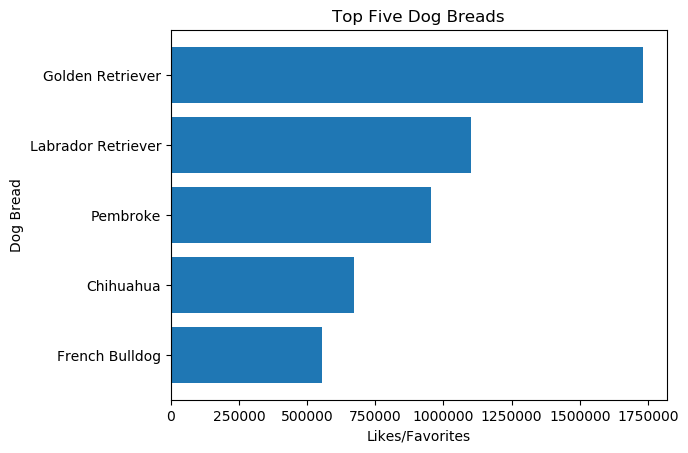

In [124]:
fig, ax = plt.subplots()
y_pos = np.arange(len(bread_labels))
ax.barh(y_pos, favorite_count_per_bread, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(bread_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Likes/Favorites')
ax.set_ylabel('Dog Bread')
ax.set_title('Top Five Dog Breads')
plt.savefig(os.path.join(documentation_directory, 'top_five_dog_breads.png'), bbox_inches = "tight", pad_inches = 1)
plt.show()

# What's the most common hour to tweet?

In [125]:
tweets_at_certain_hour = df.groupby(df.tweet_date.dt.hour)['tweet_id'].agg('count')
tweets_at_certain_hour

tweet_date
0     252
1     272
2     206
3     170
4      94
5      25
6       3
13      1
14      8
15     91
16    189
17    158
18     99
19     81
20     75
21     70
22     67
23    108
Name: tweet_id, dtype: int64

# Most of The Tweets are posted from 00:00 AM to 5:00 AM.

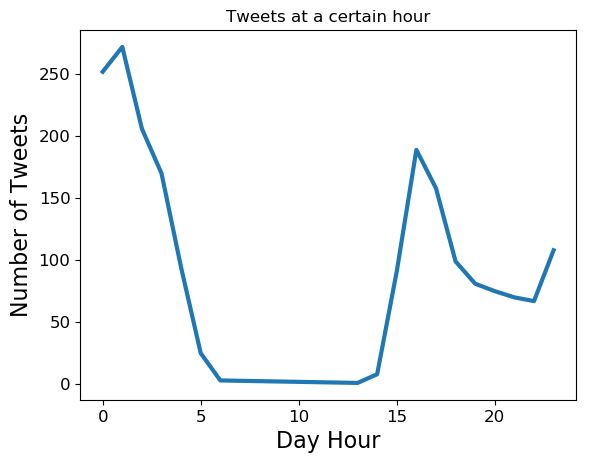

In [126]:
ax = tweets_at_certain_hour.plot(fontsize = 12, linewidth = 3)
ax.set_xlabel('Day Hour', fontsize = 16)
ax.set_ylabel('Number of Tweets', fontsize = 16)
ax.set_title('Tweets at a certain hour')
plt.savefig(os.path.join(documentation_directory, 'tweets_at_certain_hour.png'), bbox_inches = "tight", pad_inches = 1)
plt.show()

# Which dog breads that WeRateDogs care the most which exists a month that has most number of tweets.

In [127]:
filtered_df = df.loc[:, ['tweet_date', 'tweet_id']].copy()
filtered_df = filtered_df.set_index('tweet_date')
filtered_df

,tweet_id
tweet_date,
2017-08-01 16:23:56,892420643555336193
2017-08-01 00:17:27,892177421306343426
2017-07-31 00:18:03,891815181378084864
2017-07-30 15:58:51,891689557279858688
2017-07-29 16:00:24,891327558926688256
2017-07-29 00:08:17,891087950875897856
2017-07-28 16:27:12,890971913173991426
2017-07-28 00:22:40,890729181411237888
2017-07-27 16:25:51,890609185150312448


# December has the most peak

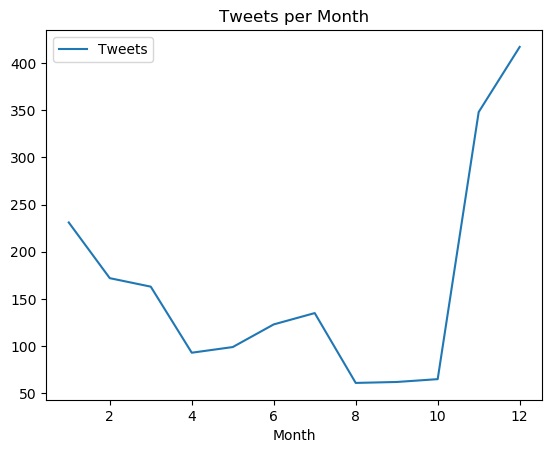

In [128]:
index_month = filtered_df.index.month
tweets_count = filtered_df.groupby(index_month).count()
ax = tweets_count.plot()
ax.set_title('Tweets per Month')
ax.set_xlabel('Month')
ax.legend(['Tweets'])
plt.savefig(os.path.join(documentation_directory, 'month_with_the_tweets.png'), bbox_inches = "tight", pad_inches = 1)
plt.show()

In [129]:
most_peak_month = 12 # december
filter_condition = df.tweet_date.dt.month == 12
df.loc[filter_condition, 'dog_bread'].value_counts()

Golden Retriever                  27
Chihuahua                         22
Pug                               19
Labrador Retriever                18
Pembroke                          14
Toy Poodle                        12
Pomeranian                        11
Beagle                             9
Maltese Dog                        8
Samoyed                            8
Shih Tzu                           8
Chow                               8
Lakeland Terrier                   6
Malamute                           6
Schipperke                         5
Rottweiler                         5
Staffordshire Bullterrier          5
Vizsla                             5
French Bulldog                     5
Dalmatian                          5
West Highland White Terrier        5
Cocker Spaniel                     5
Airedale                           5
Doberman                           4
Cardigan                           4
Eskimo Dog                         4
Basset                             4
S